In [0]:
#Fashiom MNIST Dataset

In [2]:
import keras
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train,y_train), (X_test,y_test) = fashion_mnist.load_data()

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

T-shirt/top


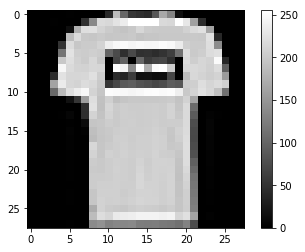

In [5]:
plt.imshow(X_train[1],cmap='gray')
plt.colorbar()
print(class_names[y_train[1]])

In [0]:
X_train.shape

(60000, 28, 28)

In [0]:
X_test.shape

(10000, 28, 28)

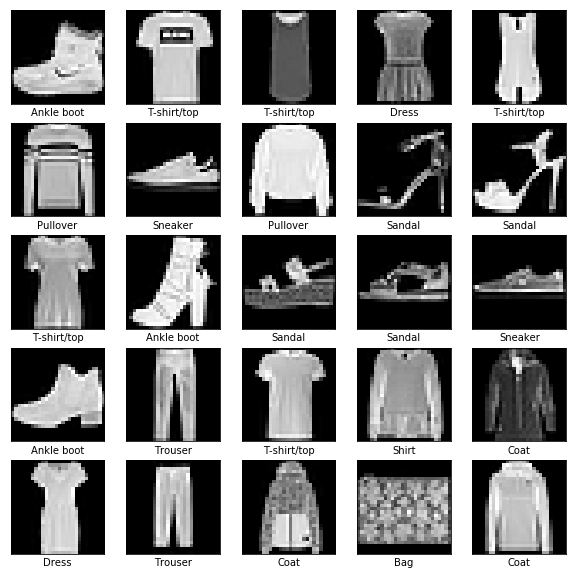

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [6]:
# Making sure that the values are float so that we can get decimal points after division
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#Pre-Process Images
X_train=X_train/255.0
X_test=X_test/255.0

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

T-shirt/top


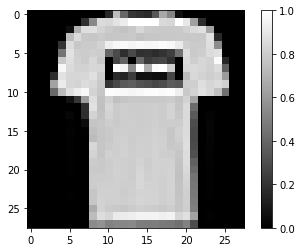

In [9]:
plt.imshow(X_train[1].reshape(28,28),cmap='gray')
plt.colorbar()
print(class_names[y_train[1]])

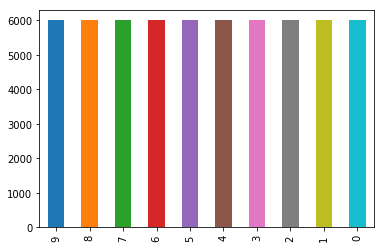

In [10]:
y_train_data=pd.DataFrame({'categories':y_train})
y_train_data['categories'].value_counts().plot.bar()

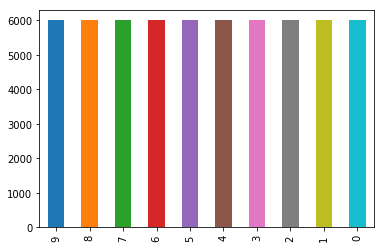

In [11]:
y_test_data=pd.DataFrame({'categories':y_train})
y_test_data['categories'].value_counts().plot.bar()

Deep Learning

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,BatchNormalization,Activation

model= Sequential()
model.add(Flatten(input_shape=(28,28)))

model.add(Dense(256, kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(256, kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(128, kernel_initializer='uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(output_dim = 10, kernel_initializer = 'uniform', activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size =32,nb_epoch = 40)

In [0]:
model.summary()

In [0]:
y_pred = model.predict_classes(X_test)

In [0]:
model.save('Fashion_MNIST_89.63%_ANN.h5')

In [0]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix',cm)
print('Accuracy Score',accuracy_score(y_test, y_pred)*100)
from sklearn.metrics import classification_report,f1_score
print('Classification Report \n',classification_report(y_test, y_pred))

In [0]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print('Test accuracy:', test_acc)

In [0]:
predictions = model.predict(X_test)

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [0]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, y_test)
plt.show()

In [17]:
#Pre-Processing required for CNN
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [18]:
X_train.shape

(60000, 28, 28, 1)

In [19]:
X_test.shape

(10000, 28, 28, 1)

In [0]:
y_train.shape

(60000,)

In [0]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [0]:
y_train=y_train.reshape(60000,1)
print(y_train.shape)
onehotencoder = OneHotEncoder(categories='auto')
y_train= onehotencoder.fit_transform(y_train).toarray()

(60000, 1)


In [0]:
y_test=y_test.reshape(10000,1)
print(y_test.shape)
onehotencoder = OneHotEncoder(categories='auto')
y_test= onehotencoder.fit_transform(y_test).toarray()

(10000, 1)


In [13]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,BatchNormalization,Dropout
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras import regularizers

In [14]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(2,2), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(filters=64, kernel_size=(4, 4),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=(5, 5),activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(256, activation='relu',kernel_initializer='uniform'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu',kernel_initializer='uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
callbacks = [EarlyStopping(monitor='val_acc', patience=4),
             ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

In [109]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 27, 27, 32)        160       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 24, 24, 64)        32832     
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_17 (Batc (None, 12, 12, 64)        256       
_________________________________________________________________
dropout_35 (Dropout)         (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 8, 8, 128)         204928    
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 6, 6, 64)          73792     
__________

In [111]:
model.fit(X_train,y_train,batch_size=32,epochs=40,validation_data=(X_test,y_test),callbacks=callbacks)

Train on 60000 samples, validate on 10000 samples
Epoch 1/40
60000/60000 [==============================] - 18s 304us/step - loss: 0.4505 - acc: 0.8337 - val_loss: 0.3402 - val_acc: 0.8828
Epoch 2/40
60000/60000 [==============================] - 16s 261us/step - loss: 0.3055 - acc: 0.8907 - val_loss: 0.2906 - val_acc: 0.8944
Epoch 3/40
60000/60000 [==============================] - 16s 261us/step - loss: 0.2638 - acc: 0.9048 - val_loss: 0.2651 - val_acc: 0.9018
Epoch 4/40
60000/60000 [==============================] - 16s 262us/step - loss: 0.2399 - acc: 0.9135 - val_loss: 0.2424 - val_acc: 0.9121
Epoch 5/40
60000/60000 [==============================] - 16s 264us/step - loss: 0.2196 - acc: 0.9211 - val_loss: 0.2471 - val_acc: 0.9083
Epoch 6/40
60000/60000 [==============================] - 16s 264us/step - loss: 0.2044 - acc: 0.9254 - val_loss: 0.2728 - val_acc: 0.9041
Epoch 7/40
60000/60000 [==============================] - 16s 260us/step - loss: 0.1870 - acc: 0.9313 - val_loss: 0.

In [15]:
from keras.models import load_model
model=load_model('model_fashion.h5')

Instructions for updating:
Use tf.cast instead.


In [20]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 20s 2ms/step
Test accuracy: 0.9256


In [21]:
y_pred=model.predict_classes(X_test)

In [22]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix',cm)
print('Accuracy Score',accuracy_score(y_test, y_pred)*100)
from sklearn.metrics import classification_report,f1_score
print('Classification Report \n',classification_report(y_test, y_pred))

Confusion Matrix [[834   2  14   8   1   1 137   0   3   0]
 [  1 985   0   9   1   0   2   0   2   0]
 [ 15   1 909  11  24   0  40   0   0   0]
 [ 16   2   8 925  21   0  27   0   1   0]
 [  0   0  67  16 871   0  44   0   2   0]
 [  0   0   1   0   0 989   0   9   0   1]
 [ 57   0  57  20  42   0 819   0   5   0]
 [  0   0   0   0   0   6   0 986   0   8]
 [  2   0   0   4   1   1   4   0 988   0]
 [  0   0   0   0   0   8   0  42   0 950]]
Accuracy Score 92.56
Classification Report 
               precision    recall  f1-score   support

           0       0.90      0.83      0.87      1000
           1       0.99      0.98      0.99      1000
           2       0.86      0.91      0.88      1000
           3       0.93      0.93      0.93      1000
           4       0.91      0.87      0.89      1000
           5       0.98      0.99      0.99      1000
           6       0.76      0.82      0.79      1000
           7       0.95      0.99      0.97      1000
           8       0